# Prediction of percentage of a student score based on study hours

###  Author - Kaushik


In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [11]:
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


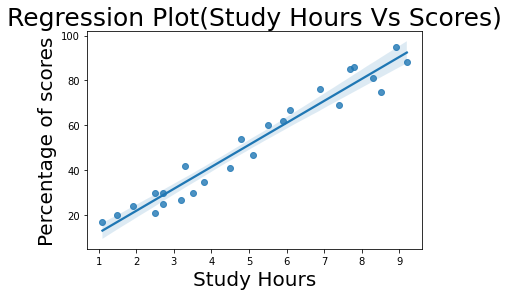

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
# https://towardsdatascience.com/seaborn-python-8563c3d0ad41

sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot(Study Hours Vs Scores)',size=25)
plt.ylabel('Percentage of scores', size=20)
plt.xlabel('Study Hours', size=20)
plt.show()
print(data.corr())

## Training the Model
### 1) Splitting the Data

In [5]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [6]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Your model is trained . Training is completed")

Your model is trained . Training is completed


## Visually Comparing the Predicted Marks with the Actual Marks

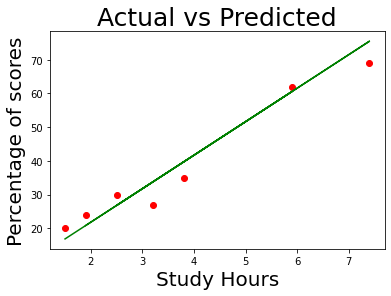

In [7]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='green')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Percentage of scores', size=20)
plt.xlabel('Study Hours', size=20)
plt.show()

In [8]:
# error calculation
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


### Calculating the Score based on student study hours

In [9]:
h = [float(input("Enter the student study Hours::"))]
result = regression.predict([h])
print('Student study Hours:', h)
print("Predicted Score is : ",result[0])


Enter the student study Hours::9.25
Student study Hours: [9.25]
Predicted Score is :  93.89272889341655


### Hence Obtained the required result